In [1]:
import pandas as pd

In [2]:
file_path='marketing_data.csv'
df=pd.read_csv(file_path)

In [3]:
df_info=df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
df_head=df.head()
df_head

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [9]:
df['Income'] = df['Income'].str.replace(r'[\$,]', '', regex=True).astype(float)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(
    lambda x: x.fillna(x.mean())
)

In [10]:
print("\nUnique values in Education:\n", df['Education'].unique())
print("\nUnique values in Marital_Status:\n", df['Marital_Status'].unique())


Unique values in Education:
 ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Unique values in Marital_Status:
 ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [11]:
df['Education'] = df['Education'].replace({
    '2n Cycle': 'Master',
    'Basic': 'High School',
    'Graduation': 'Graduate',
    'PhD': 'PhD',
    'Master': 'Master'
})

In [12]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Married',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other',
    'Divorced': 'Divorced',
    'Widow': 'Widow',
    'Single': 'Single',
    'Married': 'Married'
})

In [13]:
df[['Income', 'Dt_Customer', 'Education', 'Marital_Status']].head()

,Income,Dt_Customer,Education,Marital_Status
0,84835.0,2014-06-16,Graduate,Divorced
1,57091.0,2014-06-15,Graduate,Single
2,67267.0,2014-05-13,Graduate,Married
3,32474.0,2014-05-11,Graduate,Married
4,21474.0,2014-04-08,Graduate,Single


In [14]:
from datetime import datetime

In [15]:
current_year = datetime.now().year
df['Age'] = 2025 - df['Year_Birth']
df['Customer_Since'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

In [16]:
df[[ 'Customer_Since' , 'Age', 'Total_Spending', 'Total_Purchases']].head()

,Customer_Since,Age,Total_Spending,Total_Purchases
0,4038,55,1190,14
1,4039,64,577,17
2,4072,67,251,10
3,4074,58,11,3
4,4107,36,91,6


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

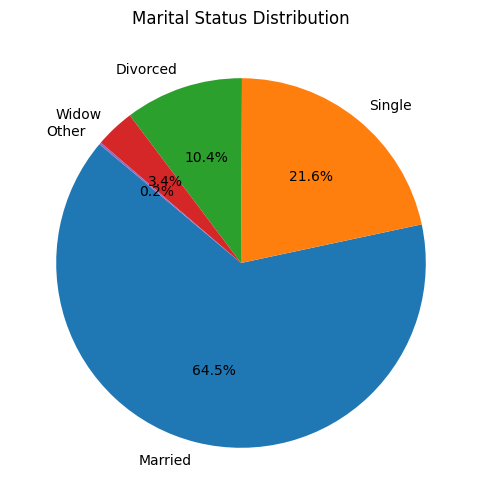

In [18]:
plt.figure(figsize=(6,6))
marital_counts = df['Marital_Status'].value_counts()
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.show()

C:\Users\Riya\AppData\Local\Temp\ipykernel_15860\1024514039.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Education', y='Income', data=df, estimator=pd.Series.mean, ci=None)


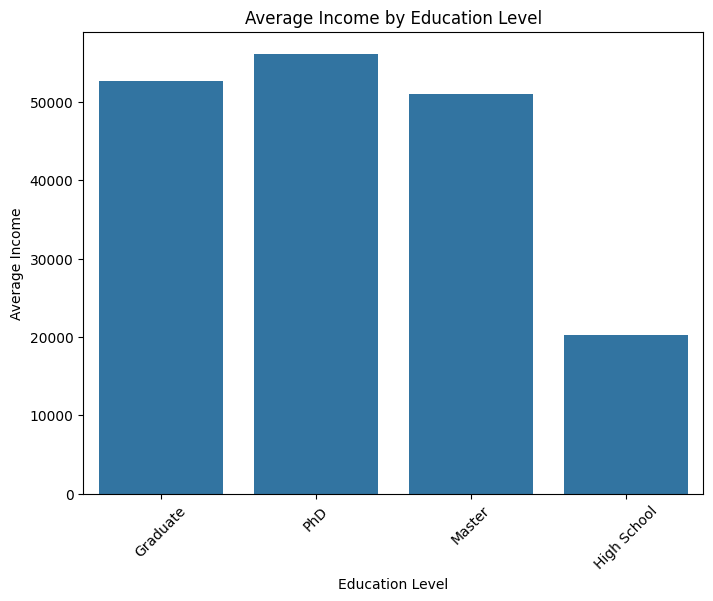

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='Education', y='Income', data=df, estimator=pd.Series.mean, ci=None)
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()

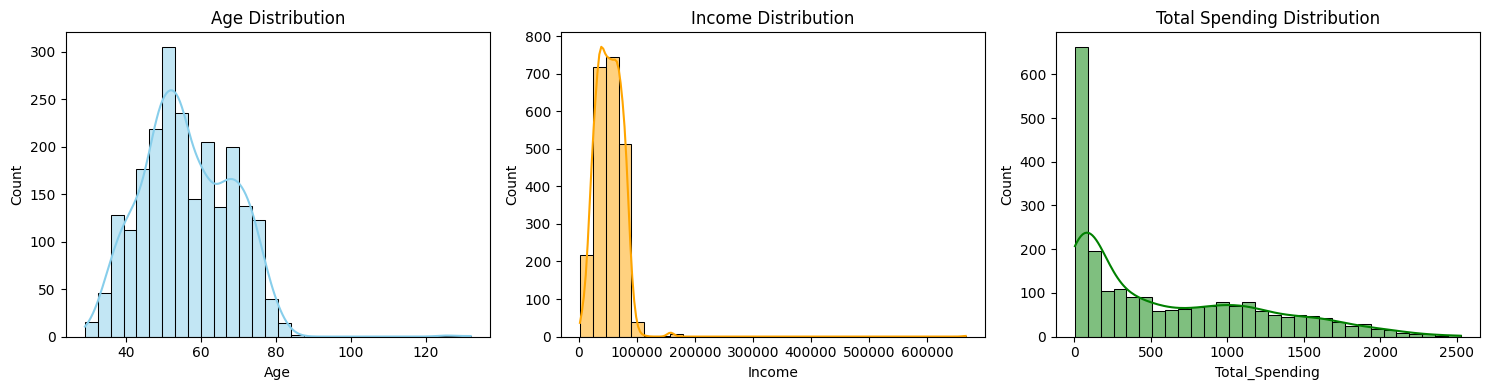

In [20]:
# 1. Univariate Analysis

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Income'].dropna(), kde=True, bins=30, color='orange')
plt.title('Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Total_Spending'], kde=True, bins=30, color='green')
plt.title('Total Spending Distribution')

plt.tight_layout()
plt.show()

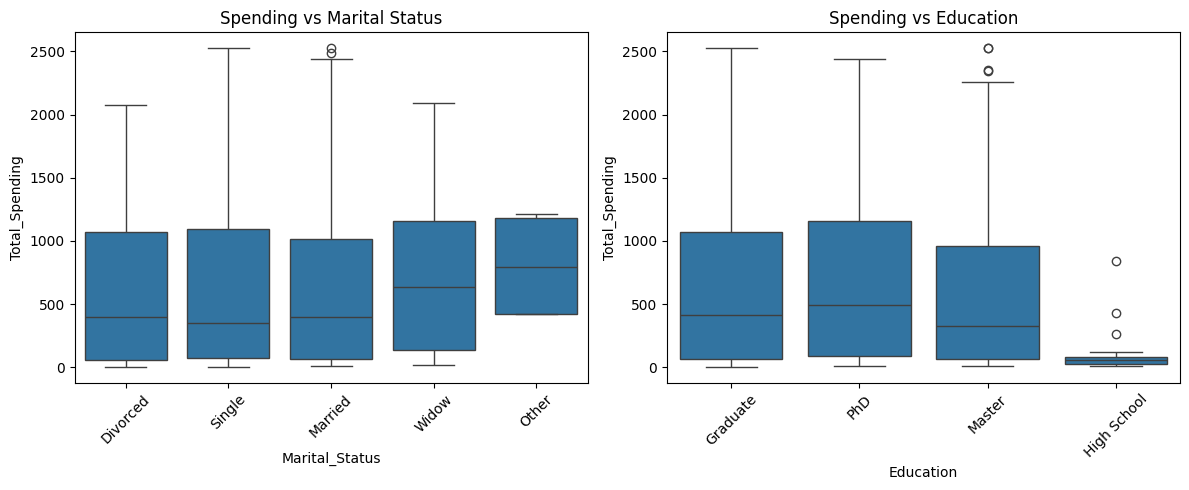

In [21]:
# 2. Bivariate Analysis

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Marital_Status', y='Total_Spending')
plt.title('Spending vs Marital Status')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Education', y='Total_Spending')
plt.title('Spending vs Education')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

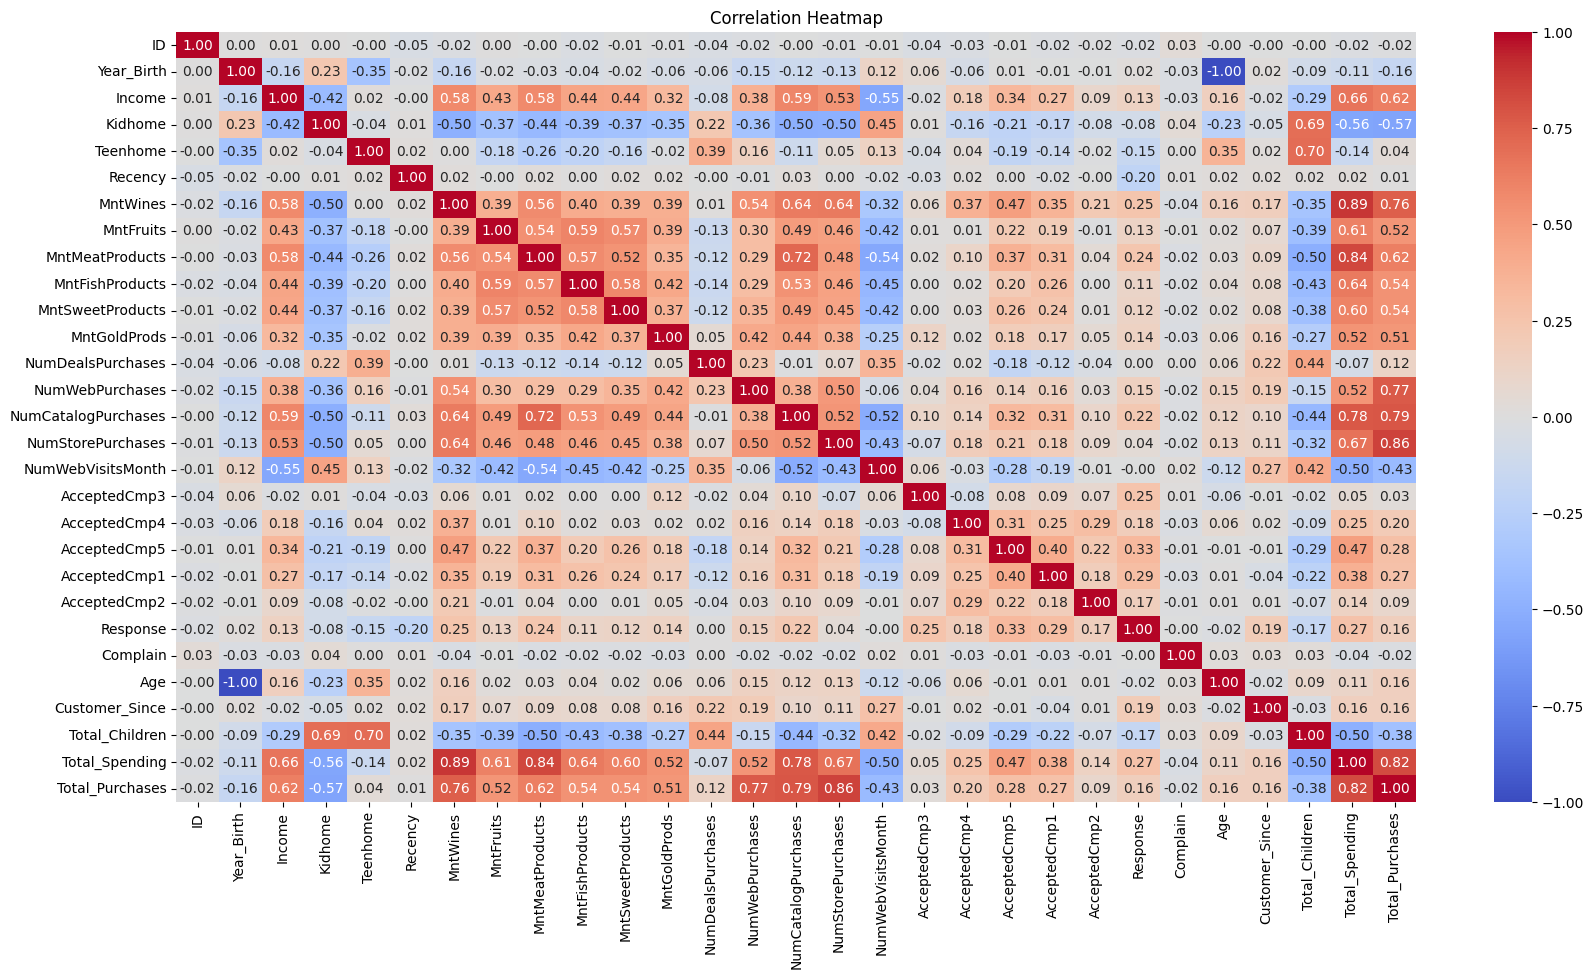

In [22]:
# 3. Correlation Heatmap

plt.figure(figsize=(20, 10))
num_vars = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(num_vars, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [23]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

In [24]:
spending_outliers = detect_outliers_iqr(df, 'Total_Spending')
spending_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Customer_Since,Total_Children,Total_Spending,Total_Purchases
671,5735,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,0,0,0,0,SP,34,4161,0,2525,17
672,5350,1991,Master,Single,90638.0,0,0,2014-02-13,29,1156,...,0,0,1,0,SA,34,4161,0,2525,17
1404,1763,1988,Graduate,Married,87679.0,0,0,2013-07-27,62,1259,...,1,0,1,0,CA,37,4362,0,2524,28


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [26]:
#select feature
features = df[['Age', 'Income', 'Total_Spending', 'Total_Children']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [27]:
# Elbow Method to find optimal clusters

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

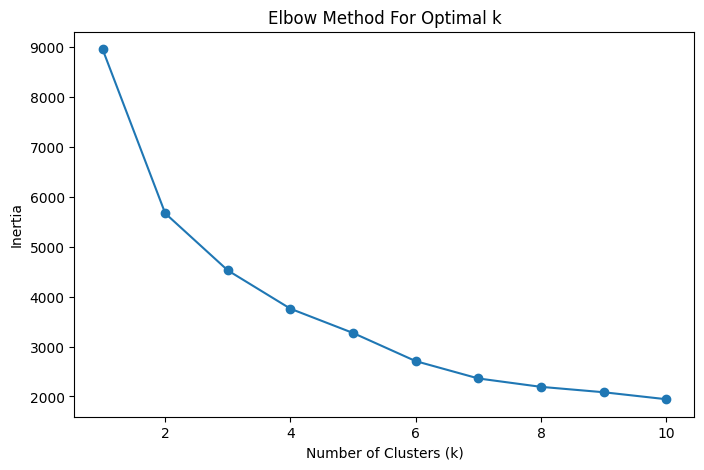

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [29]:
# 3Apply K-Means with chosen k (k= 4)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(scaled_features)

In [30]:
features['Cluster'] = cluster_labels

In [31]:
# Visualize Clusters using PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

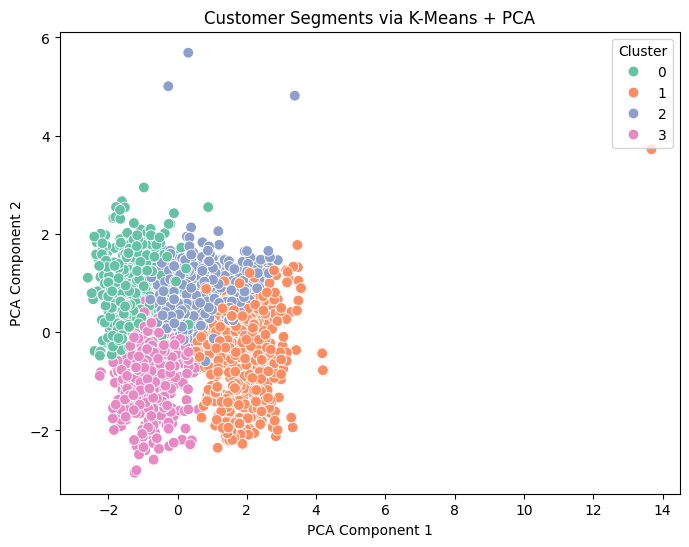

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cluster_labels, palette='Set2', s=60)
plt.title('Customer Segments via K-Means + PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [33]:
# marketing analysis

# 1. Who are the high spenders?
high_spenders = df[df['Total_Spending'] > df['Total_Spending'].quantile(0.75)]
print("High Spenders (Top 25%):")
print(high_spenders[['ID', 'Income', 'Total_Spending', 'Education', 'Marital_Status']].head())

High Spenders (Top 25%):
       ID   Income  Total_Spending Education Marital_Status
0    1826  84835.0            1190  Graduate       Divorced
5    7348  71691.0            1192       PhD         Single
6    4073  63564.0            1215    Master        Married
10   2079  81044.0            1208    Master        Married
12  10530  67786.0            1156       PhD          Widow
